# Brownian Motion
# Problem statement:

A discrete version of Brownian motion for the velocity of a large penguin at time t, vt, obeys:

$v_{t} = v_{t-1} − αv_{t-1} + S_{t-1}$,

where S is randomly ±1 at every time step, and α is a dimensionless drag
coefficient. Solve this numerically for α = 0.01, and show that 

$⟨v_{t}v_{t'} ⟩ = Ae^{−B|t−t′|}$,


for late times where both t and t′ are large, and estimate A and B.
By varying α, find the α dependence of A and B. What is the temperature of this system?

In [2]:
import os
import numpy as np
from random import randint
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit as opt
sns.set_style('white')

This brownian motion obeys: $$ v_t = v_{t-1} - \alpha v_{t-1} +S_{t-1} ,$$ where $\alpha = 0.01$. 

In [159]:
# set up params
alpha = 0.01
s_vals = [1., -1.]
endtime = 1000
velocities = np.empty(shape=endtime)
velocities[0] = 0.

In [160]:
# brownian motion
for i in range(1, endtime):
    S = np.random.choice(s_vals)
    v_last = v[i - 1]
    velocities[i] = (1-alpha)*v_last + S

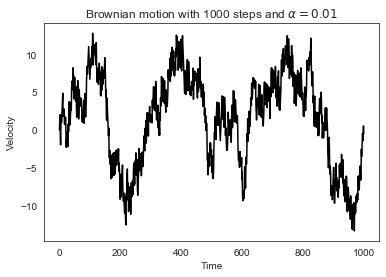

In [164]:
# plot this to see
times = np.linspace(0, endtime, endtime)

plt.figure()
plt.title(r"Brownian motion with 1000 steps and $\alpha = 0.01$")
plt.xlabel("Time")
plt.ylabel("Velocity")
plt.plot(times, velocities, c='black')
plt.show()

We now do this for 100 velocities in order to see an average behaviour and compute $<v_t v_{t'}>$.

In [37]:
# set up 2d-array
velocities_100 = np.empty(shape=(endtime, 100))
velocities_100[:, 0] = 0.

In [38]:
# fill up with 100 simulations
for i in range(1, endtime):
    S_100 = np.random.choice(s_vals, size=100)
    v_last_100 = velocities_100[i-1, :]
    velocities_100[i, :] = (1-alpha)*v_last_100 + S_100

In [46]:
# get array of products
products = np.empty(shape=(endtime, endtime, 100))
for i in range(100):
    products[:, :, i] = np.outer(velocities_100[:, i], velocities_100[:, i])

In [47]:
# averahe out products
products_avg = np.mean(products, axis = 2)

Let's plot this and take a look at our 2-dimensional array:

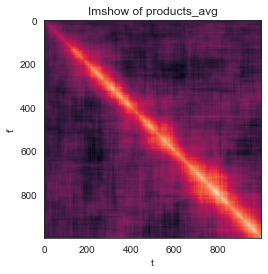

In [145]:
# show the array
plt.figure()
plt.title("Imshow of products_avg")
plt.imshow(products_avg)
plt.xlabel("t")
plt.ylabel("t'")
plt.show()

Thus the velocities are more highly correlated when the times are equal, as we expect. We now want to plot $< v_t v_{t'} > $ as a function of the time difference, $|t-t'|$.

In [165]:
# make matrix with entries |t-t'|
abs_matrix = np.empty(shape = products_avg.shape)

for i in range(endtime): # length of column/row
    for j in range(endtime):
        abs_matrix[i][j] = abs(i-j)

In [60]:
# flatten arrays for plotting
products_avg_flat = np.ndarray.flatten(products_avg)
abs_matrix_flat = np.ndarray.flatten(abs_matrix)

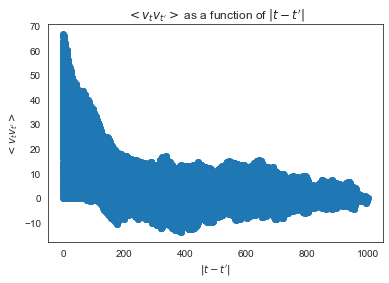

In [146]:
# have a look
plt.figure()
plt.title("$< v_t v_{t'} > $ as a function of $|t-t'|$")
plt.scatter(abs_matrix_flat, products_avg_flat)
plt.xlabel("$|t-t'|$")
plt.ylabel("$< v_t v_{t'} > $")
plt.show()

This is way too many points. Without color gradients, we can't tell which ones are actually important and which ones are just fluctuation. To remedy this, we can take a small - but still relatively large - sample of points from **abs_matrix_flat** and **products_avg_flat**.

In [90]:
# make index list
index_list = np.linspace(1, len(abs_matrix_flat), len(abs_matrix_flat)) # we have 1000^2 indices from flatten

# pick 500 from indices
from random import sample
indices_strings = sample(list(index_list), 500)

# convert to int
indices = [int(index) for index in indices_strings]

In [92]:
# values to plot
y_values = [products_avg_flat[index] for index in indices]
x_values = [abs_matrix_flat[index] for index in indices]

In [147]:
# define the function we want to overlay and check
def exp_fit(t,A,B):
    f = np.multiply(A,np.exp(-np.multiply(B,t)))
    return f

[]

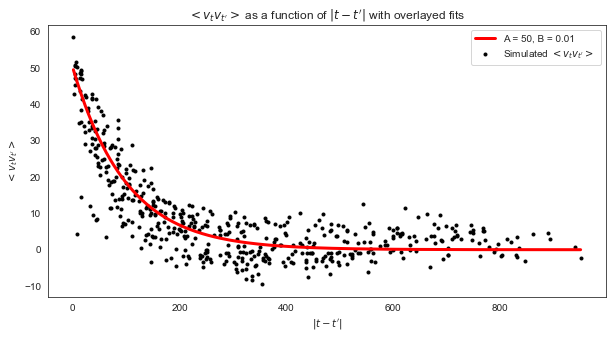

In [127]:
# plot them with some 'fits'
plt.figure(figsize=(10,5))
plt.scatter(x_values, y_values, c='black', marker='.', label="Simulated $<v_t v_{t'}>$ ")
plt.plot(np.sort(x_values), exp_fit(np.sort(x_values), 50, 0.01), lw=3, c='red', 
         label = 'A = 50, B = 0.01')
plt.title(r"$<v_t v_{t'}>$ as a function of $|t-t'|$ with overlayed fits")
plt.xlabel("$|t-t'|$")
plt.ylabel("$<v_t v_{t'}>$")
plt.legend()
plt.plot()

This looks good! We see that values of $A = 50$ and $B = 0.01$ satisfy this simulation for $\alpha = 0.01$.

We must now vary $\alpha$ to find the dependence of $A$ and $B$.

In [148]:
# define a big function to be called a few times to check dependence
def double_v_average(alpha, A, B): # only let alpha vary with the same params
    #set up params
    s_vals = [1., -1.]
    endtime = 1000
    velocities = np.empty(shape=endtime)
    velocities[0] = 0.
    
    # do brownian motion
    for i in range(1, endtime):
        S = np.random.choice(s_vals)
        v_last = v[i - 1]
        velocities[i] = (1-alpha)*v_last + S
    
    # find <v_t v_t'>
    
    # set up 2d-array 
    velocities_100 = np.empty(shape=(endtime, 100))
    velocities_100[:, 0] = 0.
    
    # fill with 100 random walks
    for i in range(1, endtime):
        S_100 = np.random.choice(s_vals, size=100)
        v_last_100 = velocities_100[i-1, :]
        velocities_100[i, :] = (1-alpha)*v_last_100 + S_100
        
    # get array of products
    products = np.empty(shape=(endtime, endtime, 100))
    
    # take outer product for each simulation
    for i in range(100):
        products[:, :, i] = np.outer(velocities_100[:, i], velocities_100[:, i])
    
    # take average
    products_avg = np.mean(products, axis = 2)
    
    # flatten to plot (still using same abs_matrix)
    products_avg_flat = np.ndarray.flatten(products_avg)

    # take out some values (still using same x_values and random indices) 
    y_values = [products_avg_flat[index] for index in indices]
    
    
    plt.figure(figsize=(10,5))
    plt.scatter(x_values, y_values, c='black', marker='.', label="Simulated $<v_t v_{t'}>$ ")
    plt.plot(np.sort(x_values), exp_fit(np.sort(x_values), A, B), lw=3, c='red', 
             label = 'A = '+str(A)+', B = '+str(B)+'')
    plt.title(r"$<v_t v_{t'}>$ as a function of $|t-t'|$ with overlayed fit")
    plt.xlabel("$|t-t'|$")
    plt.ylabel("$<v_t v_{t'}>$")
    plt.legend()
    plt.plot()

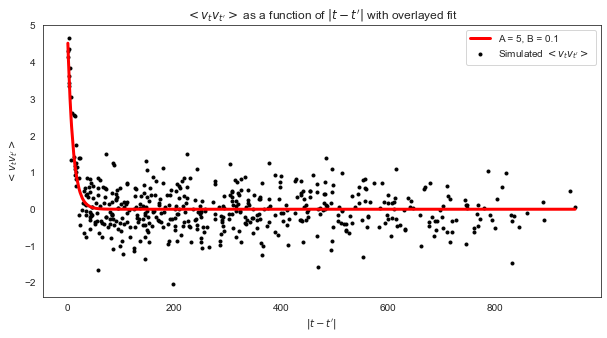

In [141]:
# alpha = 0.1
double_v_average(0.1, 5, 0.1) # we get these params after playing around

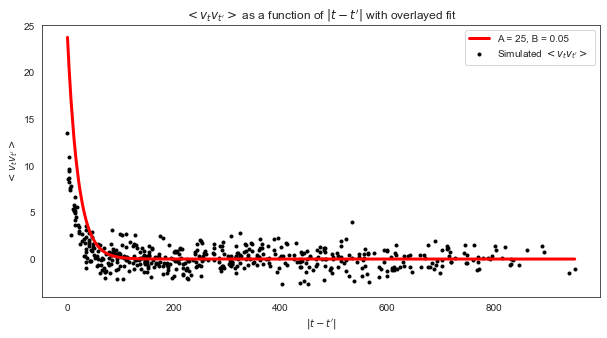

In [150]:
# alpha = 0.05
double_v_average(0.05, 25, 0.05) # again, we play around a bit

We see that a reasonable dependence on $\alpha$ would be: $$ A \propto \frac{1}{\alpha} $$ $$ B \propto \alpha .$$

By the equipartition theorem, we can use this to estimate the temperature. Indeed, for large $t, t'$, we get that $$ <v^2> = <v_t v_{t' = t} > = \frac{2 k_b T}{\alpha} ,$$ however this is also equal to $ A e^{-B|t-t'|}|_{t=t'} = A $, as we have shown above. For $\alpha = 0.01 $, we have that $A = 50$, and so: $$ A = \frac{2 k_b T}{\alpha} $$ $$ T = \frac{0.01 \times 50}{2 k_b} ,$$ giving us a temperature of:

In [154]:
k_b = 1.38e-23
Temperature = 0.01*50/(2*k_b)
print("Temperature = %.3e Kelvin," %Temperature)

Temperature = 1.812e+22 Kelvin,


A very large temperature. Note that we take $[v(t)]$ to be in $m/s$ and $[t]$ to be in seconds. In other words, we are working on very large length scales, which could explain the large value of $T$.